<a href="https://colab.research.google.com/github/Gehlen05/sms-classifier-senior-sistemas/blob/main/sms_classifier_estatisticas_senior_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import statistics

### Leitura arquivo
Projeto foi montado para rodar no colab, podendo ser rodado em outras interfaces. Porem deve se atentar aos diretorios. Para o projeto executar corretamente o arquivo sms_senior.csv devera estar na pasta do drive Colab Notebooks junto com o projeto. Caso opte por rodar na maquina no jupyter devera ser mudado o caminho.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sms_senior.csv',  encoding= 'unicode_escape', delimiter=',')
df.head()

Mounted at /content/drive


,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


Checando se a valores nulos

In [ ]:
df.isnull().sum().max()

0

Mapa de balanceamento da coluna IsSpam


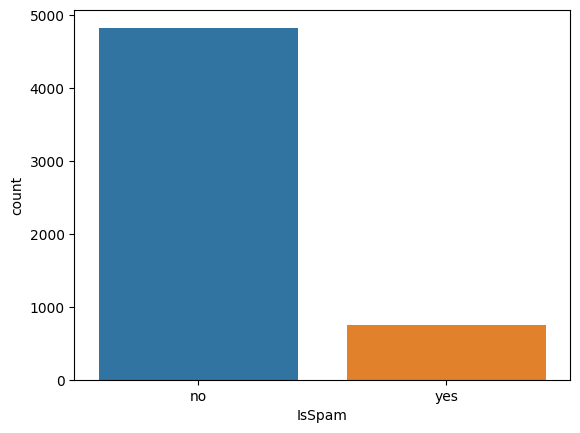

In [ ]:
ax = sns.countplot(x='IsSpam',data=df)

### Gráficos
Valores agrupados para somatorio.
Valores somados.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df_separado = df.iloc[:, 1:-4]
soma_por_coluna = df_separado.sum()
print(soma_por_coluna.sort_values(ascending=False))

call          581
now           479
can           405
get           390
will          383
             ... 
coming         50
yet            50
thk            50
people         50
guaranteed     50
Length: 149, dtype: int64


In [ ]:
soma_por_coluna = df.iloc[:, 1:-4].sum().sort_values(ascending=False)
print(soma_por_coluna)

call          581
now           479
can           405
get           390
will          383
             ... 
coming         50
yet            50
thk            50
people         50
guaranteed     50
Length: 149, dtype: int64


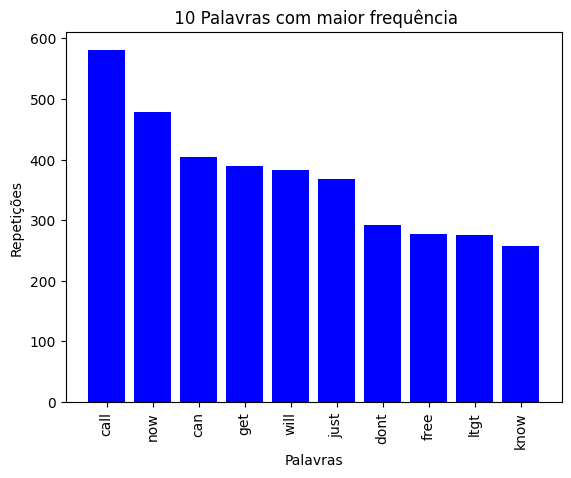

In [ ]:
plt.bar(soma_por_coluna.keys()[:10], soma_por_coluna[:10] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com maior frequência")
plt.show()

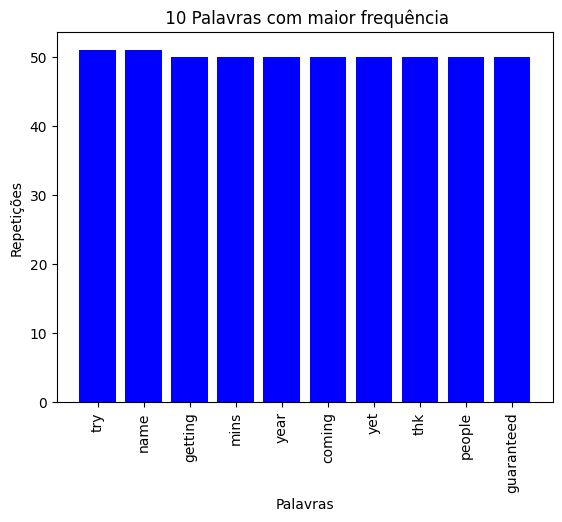

In [ ]:
plt.bar(soma_por_coluna.keys()[-10:], soma_por_coluna[-10:] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com maior frequência")
plt.show()

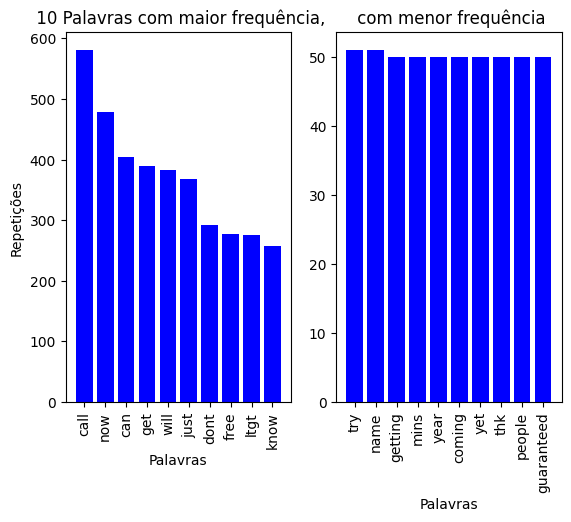

In [ ]:
plt.subplot(1, 2, 1)
plt.bar(soma_por_coluna.keys()[:10], soma_por_coluna[:10] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com maior frequência,")

plt.subplot(1, 2, 2)
plt.bar(soma_por_coluna.keys()[-10:], soma_por_coluna[-10:] , color = 'blue')
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" com menor frequência")
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
grupo_contagem = df.groupby([df['Date'].dt.to_period('M'), 'IsSpam']).size().unstack(level=-1).reset_index()

In [ ]:
grupo_contagem.head()

IsSpam,Date,no,yes
0,2017-01,1687,266
1,2017-02,1512,244
2,2017-03,1628,237


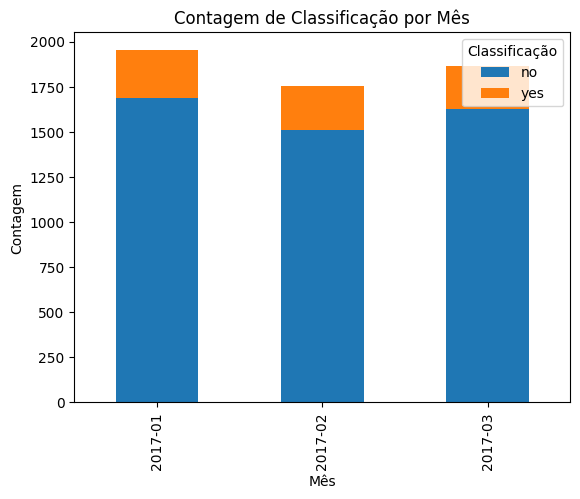

In [ ]:
grupo_contagem.plot(kind='bar', stacked=True)
plt.title('Contagem de Classificação por Mês')
plt.xlabel('Mês')
plt.xticks([r for r in range(len(grupo_contagem))], grupo_contagem['Date'], rotation=90)
plt.ylabel('Contagem')
plt.legend(title='Classificação')
plt.show()


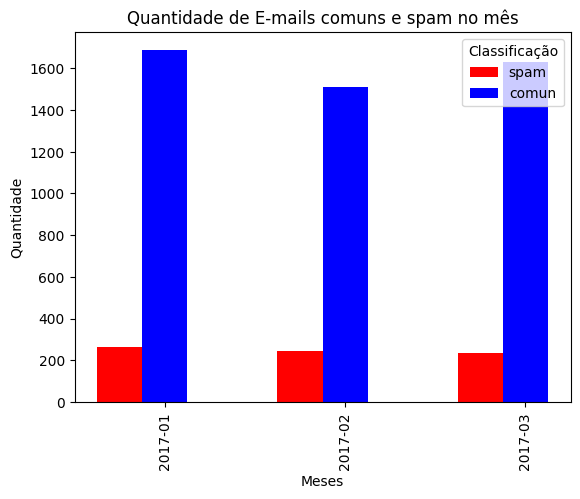

In [ ]:
barWidth = 0.25
r1 = np.arange(len(grupo_contagem))
r2 = [x + barWidth for x in r1]

plt.bar( r1, grupo_contagem['yes'], color = 'red', width=barWidth, label='spam')
plt.bar( r2 , grupo_contagem['no'], color = 'blue', width=barWidth, label='comun')
plt.ylabel("Quantidade")
plt.xlabel("Meses")
plt.xticks([r + barWidth for r in range(len(grupo_contagem))], grupo_contagem['Date'], rotation=90)
plt.title("Quantidade de E-mails comuns e spam no mês")
plt.legend(title='Classificação')
plt.show()

### Estatísticas

In [ ]:
estatistica_agrupada = df.groupby(df['Date'].dt.to_period('M'))['Word_Count']

In [ ]:
for mes, Word_Count in estatistica_agrupada:
  media= statistics.mean(Word_Count)
  mediana = statistics.median(Word_Count)
  desvio = statistics.pstdev(Word_Count)
  varianca = statistics.pvariance(Word_Count)
  print(f'{mes} - media: {media} mediana:{mediana} desvio:{desvio} variança:{varianca}')

2017-01 - media: 16.336917562724015 mediana:13 desvio:12.55395540599671 variança:157.60179633575402
2017-02 - media: 16.029043280182233 mediana:13.0 desvio:11.039314678039085 variança:121.86646856076919
2017-03 - media: 16.28525469168901 mediana:12 desvio:11.573109362823462 variança:133.93686032387208


In [ ]:
from itertools import groupby
mensagens_comuns = df[df['IsSpam'] == 'no']

def calculo_sequencia(data):
    return max(len(list(group)) for key, group in groupby(data))

maiores_sequencias = []
for mes, grupo in mensagens_comuns.groupby(mensagens_comuns['Date'].dt.month):
    maior_sequencia = calculo_sequencia(grupo['Date'].dt.day)
    maiores_sequencias.append((mes, maior_sequencia))

for dia, sequencia in maiores_sequencias:
    print(f"Mês: {dia}, Maior Sequência: {sequencia}")


Mês: 1, Maior Sequência: 69
Mês: 2, Maior Sequência: 72
Mês: 3, Maior Sequência: 69


In [ ]:
df_comum = df[df['IsSpam'] == 'no']

agrupado = df_comum.groupby([df_comum['Date'].dt.to_period('M'), df_comum['Date'].dt.day])['Date'].count()
dia_maior_mensagens_por_mes = agrupado.groupby('Date').idxmax()

print(dia_maior_mensagens_por_mes)

Date
2017-01     (2017-01, 1)
2017-02    (2017-02, 13)
2017-03     (2017-03, 8)
Freq: M, Name: Date, dtype: object
